# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
# STUDENTS I DISCUSSED WITH: Sam Ryan

from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from scipy import stats
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [2]:
# Load the dataset 
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [3]:
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [4]:
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

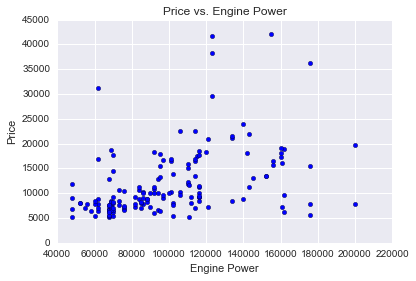

In [5]:
plot = plt.scatter(auto_numeric["engine-power"], auto_numeric["price"])
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.title('Price vs. Engine Power')

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

Engine-power alone is no sufficient for prediciting price. As shown in the scatter plot above, there seems to be very vague positive correlation between price and Engine Power, but there are too many outliers. The outliers are going to skew any predictor created with just this one attribute. The outliers also show that there's probably multiple additional factors that contribute to the Price. 

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

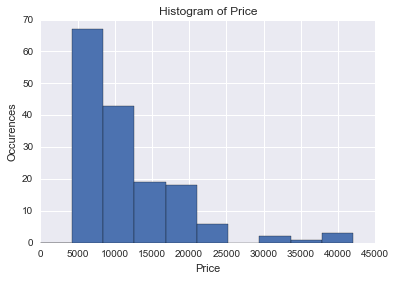

In [6]:
x = auto_numeric['price'].copy(deep=True)
plt.hist(x, range=[0, int(max(x))])
plt.xlabel("Price")
plt.ylabel("Occurences")
plt.title("Histogram of Price")

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

As I explained above, the outliers are going to skew any model made only using the Engine Power attribute. These outliers aren't mistakes, they indicate there are other attributes that contribute to the determination of Price. So as a part of preprocessing I would want to either remove the obvious outliers (>\$25000) or perform a transformation on the dataset to make the outliers less influential. I believe it was mentioned in lecture that a logarithmic transformation would be good at doing such a task.

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [7]:
auto_numeric_copy = auto_numeric.copy(deep=True)
X = auto_numeric['engine-power']
y = auto_numeric['price'] # target

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [8]:
ninstances = X.shape[0]
X = np.array(X).reshape(ninstances,1)
print("New shape of X: {}".format(X.shape))

New shape of X: (159, 1)


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

Number of instances in X: 159
Number of instances in X_train: 127
Number of instances in X_test: 32
Number of instances in X_train and X_test together: 159


### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [10]:
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print('Coefficient of Determination: {:.3f}'.format(lm.score(X_train, y_train)))

Coefficient of Determination: 0.202


### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [11]:
lrc = lm.coef_
lri = lm.intercept_

print("Price = ({:.4f})*(engine-power) + ({:.4f})".format(lrc[0], lri))

Price = (0.0899)*(engine-power) + (2823.1219)


### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

As engine-power increases, the price also increases. However the since regression coefficient is tiny(.0899) this means that engine-power is not an influential variable in predicting price. If it was, then the regression coefficient would be greater and the intercept would be less (in this case).

### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

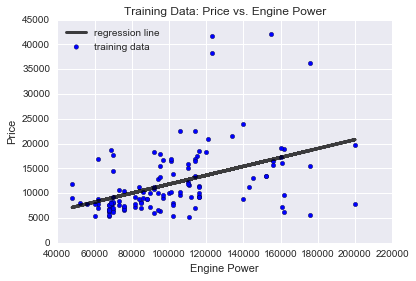

In [12]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, label='training data')
ax.plot(X_train, lm.predict(X_train), color='black', lw=3, label='regression line', alpha=.75)
ax.set_xlabel('Engine Power')
ax.set_ylabel('Price')
ax.set_title('Training Data: Price vs. Engine Power')
ax.legend(loc='upper left')


### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

If you have a small dataset, the disadvantage of using Hold-out validation is that you're using less data to train your model, and you could be losing crucial data by putting it in the testing set. The smaller the dataset, the bigger a problem this becomes. For example, is you have a dataset of 10 instances, and there's 1 big outlier. If that outlier ends up in the training set for model1 and the test set for model2, you're going to have 2 very different predictors!

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [13]:
n = X.shape[0]
kf = KFold(n, n_folds=5, shuffle=True, random_state=0)

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [14]:
j = 1
for train_index, test_index in kf:
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    print("\nKFold #{}".format(j))
    #print("Number of training instances: {} \nNumber of testing instances: {}".format(X_train.shape[0], X_test.shape[0]))
    print("Mean Value of Price Variable: {}".format(y_train.mean()))
    j+=1



KFold #1
Mean Value of Price Variable: 11853.2677165

KFold #2
Mean Value of Price Variable: 11635.976378

KFold #3
Mean Value of Price Variable: 11689.8740157

KFold #4
Mean Value of Price Variable: 11709.8267717

KFold #5
Mean Value of Price Variable: 11535.84375


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [15]:
lm2 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y_predict = cross_val_predict(lm2, X, y, cv=kf)

print("Shape of Prediction: {}".format(y_predict.shape))
print("Shape of y Vector: {}".format(y.shape))

Shape of Prediction: (159,)
Shape of y Vector: (159,)


### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [16]:
r2 = r2_score(y, y_predict)
rmse = mean_squared_error(y, y_predict)**.5
mae = mean_absolute_error(y, y_predict)
cc = np.corrcoef(y, y_predict)[0,1]

print('Coefficient of Determination: {:.3f}'.format(r2))
print('Root Mean Squared Error (RMSE): {:.3f}'.format(rmse))
print('Mean Absolute Error (MAE): {:.3f}'.format(mae))
print('Correlation Coefficient: {:.3f}'.format(cc))

Coefficient of Determination: 0.173
Root Mean Squared Error (RMSE): 6114.452
Mean Absolute Error (MAE): 3987.958
Correlation Coefficient: 0.417


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

Unlike in classification where we want to count how often we are wrong, with linear regression we are always wrong so when measuring error we want to know by <b>how much</b> were we wrong. There are several different ways to measure this error. First the Root Mean Squared error is the average squared deviation from the truth. This error measure is very sensitive to outliers. Our result was roughly \$6100, which means on average we the price was \$6100 off the true price. The prices ranged from \$5000, to \$45000, so being off by \$6100 is quite a lot. Mean Absolute Error is much less sensitive to outliers and had a value of roughly \$4000. This is still a lot, but is much less than the RMSE. 

This means two things. First, that engine-power is not a very good predictor for the price to begin with. Second, there are some outliers in our dataset that are skewing our model as shown by the large decrease from RMSE to MAE. These results reason well with the Correlation Coefficient, which is insensitive to the mean/scale of the data and indicates how well engine-power and price are correlated. Our result was .4, which supports are results. There is a relationship between engine-power and price, but it is not the only attribute that influences the price and thus does not make a good predictor by itself.

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

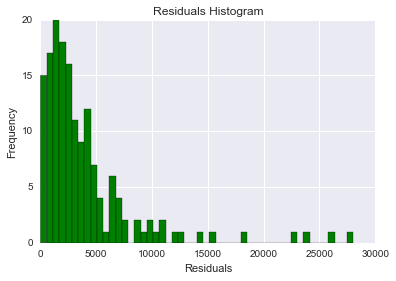

In [17]:
# Get residuals
residuals = np.absolute(y - y_predict)

# Plot Histogram
plt.hist(residuals, 50, facecolor='green')
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

Given the large RMSE and MAE values, but the decrease from RMSE to MAE, the plot should show a couple very large outliers that skew our predictor. Most of the residuals fall in a normal/acceptable range of <\$5000, but there are a couple residuals with values >\$20000. These residuals are unreasonably large and are the source of our large RMSE and MAE values.

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [18]:
# Load the dataset 
data_path2 = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path2, delimiter = ',')

# Get predictor and Target variables
X2 = auto_base['engine-power']
y2 = auto_base['price']

# Convert to 2D array
ninstances = X2.shape[0]
X2 = np.array(X2).reshape(ninstances,1)

# Hold-out validation to split the dataset into training and testing subsets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.8, test_size=0.2, random_state=0)

# KFold
n = X2.shape[0]
kf2 = KFold(n, n_folds=5, shuffle=True, random_state=0)

# fit a model to the training data
lm3 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y2_predict = cross_val_predict(lm3, X2, y2, cv=kf2)

# Report Errors
print('Coefficient of Determination: {:.3f}'.format(r2_score(y2, y2_predict)))
print('Root Mean Squared Error (RMSE): {:.3f}'.format(mean_squared_error(y2, y2_predict)**.5))
print('Mean Absolute Error (MAE): {:.3f}'.format(mean_absolute_error(y2, y2_predict)))
print('Correlation Coefficient: {:.3f}'.format(np.corrcoef(y2, y2_predict)[0,1]))

Coefficient of Determination: -0.002
Root Mean Squared Error (RMSE): 6730.844
Mean Absolute Error (MAE): 4901.861
Correlation Coefficient: -0.062


### ========== Question 1.23 ==========
Show a scatter plot of predicted vs. true price and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

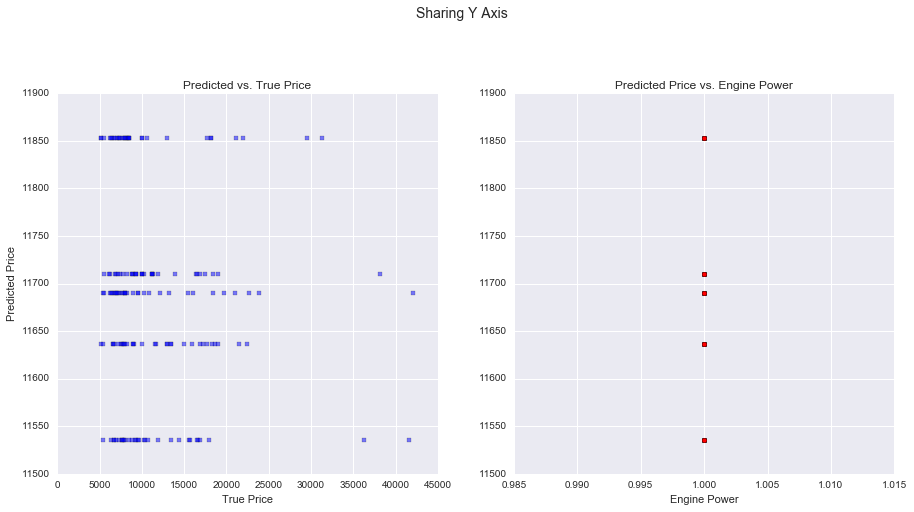

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.scatter(y2, y2_predict, c='blue', marker="s", alpha=.5)
ax1.set_title('Predicted vs. True Price')
ax1.set_ylabel('Predicted Price')
ax1.set_xlabel('True Price')

ax2 = fig.add_subplot(222)
ax2.scatter(X2, y2_predict, c='red', marker="o", alpha=.5)
ax2.set_title('Predicted Price vs. Engine Power')
ax2.set_xlabel('Engine Power')

fig.suptitle('Sharing Y Axis', fontsize=14)
fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()


### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

I find this question difficult becuase I think my train_auto_base.csv is incorrect because the model I built given this database only predicts the same value for each kfold. This makes sense because all of the engine powers in the database had a value of 1. There is not way to make a prediction other than picking a single value from the dataset. 

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [20]:
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


This model performed poorly because the auto_base dataset is horrible; all of the engine-power's had a value of 1, but the prices ranged from \$5118 to \$42056 as shown in the summary statistics above. I honestly think this might be a mistake in the auto_base dataset we were given, but I'm not sure.

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

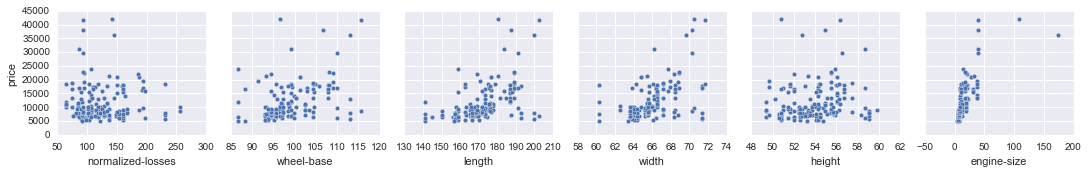

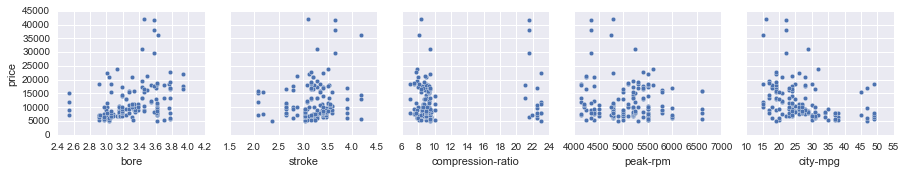

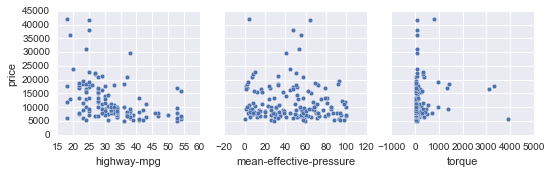

In [21]:
# Your code goes here
g1 = sns.pairplot(data=auto_numeric, x_vars=['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'engine-size'], y_vars = 'price')
g2 = sns.pairplot(data=auto_numeric, x_vars=['bore','stroke','compression-ratio','peak-rpm','city-mpg'], y_vars = 'price')
g3 = sns.pairplot(data=auto_numeric, x_vars=['highway-mpg','mean-effective-pressure','torque'], y_vars = 'price')

None of these attribute seem exceptionally good at predicting price. The attributes wheel-base, length, width, and bore seem to be the most positively correlated. Engine-size seems to have a very steep positive corrlation. Even the slighest increase in size seems to increase the size. However the attributes torque, mean-effective-pressure, highway-mpg, city-mpg, peak-rpm, comprssion-ratio, stroke, height, and normalized-losses all seem useless at predicting the price because the there's no obvious correlation. I think most of those attributes can be safely removed, but especially compression-ratio, torque, and mean-effectiveness-pressure.

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [22]:
# Get predictor and Target variables
X3 = auto_numeric.copy(deep=True)
X3 = X3[['wheel-base','length','width','engine-size','bore','city-mpg','highway-mpg']]
y3 = auto_numeric['price'].copy(deep=True)

# Hold-out validation to split the dataset into training and testing subsets
# DONT NEED
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.8, test_size=0.2, random_state=0)

# KFold
n = X3.shape[0]
kf3 = KFold(n, n_folds=5, shuffle=True, random_state=0)

# fit a model to the training data
lm4 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y3_predict = cross_val_predict(lm4, X3, y3, cv=kf3)

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [23]:
# Report Errors
print('Coefficient of Determination: {:.3f}'.format(r2_score(y3, y3_predict)))
print('Root Mean Squared Error (RMSE): {:.3f}'.format(mean_squared_error(y3, y3_predict)**.5))
print('Mean Absolute Error (MAE): {:.3f}'.format(mean_absolute_error(y3, y3_predict)))
print('Correlation Coefficient: {:.3f}'.format(np.corrcoef(y3, y3_predict)[0,1]))

Coefficient of Determination: 0.491
Root Mean Squared Error (RMSE): 4798.281
Mean Absolute Error (MAE): 2990.603
Correlation Coefficient: 0.742


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

The Coefficient of Determination greatly improved from 0.173 to 0.491. This is a pretty large jump for the CoD, and means that model is much more likely to predict an accurate price given the attributes 7 attributes I used to train the model.

The Root Mean Squared Error also decreased from \$6114 to \$4798, a roughly \$1300 difference. This means that on average we were \$1300 closer to the true price than the Simple Linear Regression Model.

The Mean Absolute Error also decreased from \$3987.958 to \$2990.60, a roughly \$1000 difference. This is also still pretty far from our new RMSE value, which means that outliers are still having a strong influence on the accuracy of our model!

Finally, the Correlation Coefficient increased from 0.417 to 0.742. This confirms that our new model is more positively correlated with the true price than the Simple Linear Regression Model, and that the correlation is pretty strong.

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

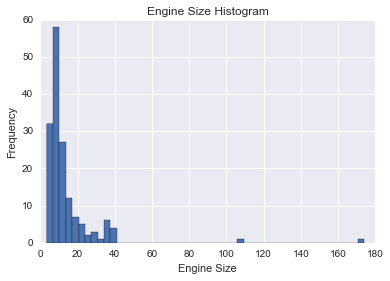

In [24]:
# Get engine-size data
engine_size = X3['engine-size']

# Plot Histogram
plt.hist(engine_size, 50)
plt.title("Engine Size Histogram")
plt.xlabel("Engine Size")
plt.ylabel("Frequency")

# Isolate Outliers
#outliers = engine_size[engine_size > 100]
#print(outliers)

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

Yes, this distribution will most certainly cause a problem. As the histogram shows there is a heavy concentration of engine sizes less than or equal to 45. Out of the 159 total datapoints there are only 2 engine sizes in the dataset that are larger, 107.77 and 174.16. These outliers differ from the maximum of the cluster(45) but 62 and 129! These are very large difference, and these two datapoints could be considered extreme outliers, greatly skewing the results. As you can also see by looking at the graph, there is a heavy concentration of point on the left, and on 2 onthe right, similar to the graph of log. A log transformation of this attribute could help remove the strong effects of the two outliers.

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

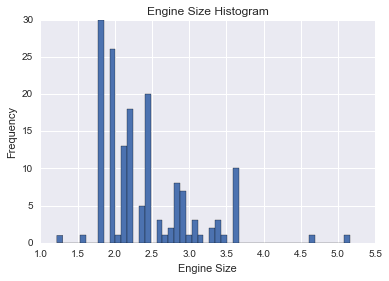

In [25]:
# transform engine-size data
X3['engine-size'] = np.log(X3['engine-size'])

# Plot Histogram
plt.hist(X3['engine-size'], 50)
plt.title("Engine Size Histogram")
plt.xlabel("Engine Size")
plt.ylabel("Frequency")

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [26]:
# KFold
n = X3.shape[0]
kf4 = KFold(n, n_folds=5, shuffle=True, random_state=0)

# fit a model to the training data
lm5 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y4_predict = cross_val_predict(lm5, X3, y3, cv=kf4)

# Report Errors
print('Coefficient of Determination: {:.3f}'.format(r2_score(y3, y4_predict)))
print('Root Mean Squared Error (RMSE): {:.3f}'.format(mean_squared_error(y3, y4_predict)**.5))
print('Mean Absolute Error (MAE): {:.3f}'.format(mean_absolute_error(y3, y4_predict)))
print('Correlation Coefficient: {:.3f}'.format(np.corrcoef(y3, y4_predict)[0,1]))

Coefficient of Determination: 0.685
Root Mean Squared Error (RMSE): 3771.588
Mean Absolute Error (MAE): 2663.191
Correlation Coefficient: 0.828


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

The performace of the model increased after performing the attribute log transformation. The R^2 value increased from 0.491 to .685, and the CC increased from 0.742 to .828. Since linear regression is so sensitive to outliers, using a log transformation is useful of an attribute can help make those outliers less influential on your predictor, as these results demonstrate.

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [27]:
pd.set_option('max_columns', 30)

In [28]:
# Load the dataset 
data_path3 = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path3, delimiter = ',')

print("Number of attributes: {}".format(auto_full.shape[1]))
print("Number of samples: {}".format(auto_full.shape[0]))
auto_full.head(20)

Number of attributes: 27
Number of samples: 159


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

The attributes: make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, and fuel-system are all categorical.

In order to perform linear regression, you need to have numbers in order to see how much an attribute contributes to the output. So with categorical attributes, you could assign each category a number but that doesn't help us because the number has to mean something in order to contribute to the output. For example, if you're prediciting CPU Performance and you have the categorical attribute of manufacturer, where {1:Intel, 4:Motorola}. Let's say the weight vecotr for this attribute is .5, Intel would contribute .5 to the prediction and Motorola would contribute 2. This is saying that Motorola is 4 times faster than Intel. This is not what we want!

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [29]:
auto_full_edit = auto_full.copy(deep=True)
target = auto_full_edit['price']
auto_full_edit = auto_full_edit.drop(['price'], axis=1) # DROP TARGET

# Transform Variables using Label Encoding
le_dict = dict() # Initialise an empty dictionary to keep all LabelEncoders

# Loop over attributes by excluding the ones that are continuous and the target variable
auto_full_droppped = auto_full_edit.drop(['normalized-losses','num-of-doors','wheel-base','length','width','height'], axis=1)
auto_full_droppped = auto_full_droppped.drop(['num-of-cylinders','engine-size','bore','stroke','compression-ratio','engine-power'], axis=1)
auto_full_droppped = auto_full_droppped.drop(['peak-rpm','city-mpg','highway-mpg','mean-effective-pressure','torque'], axis=1)

for column in auto_full_droppped:  
    le = LabelEncoder().fit(auto_full_edit[column]) # Initialise the LabelEncoder and fit
    auto_full_edit[column] = le.transform(auto_full_edit[column]) # Transform data and save in credit_clean DataFrame
    le_dict[column] = le # Store the LabelEncdoer in dictionary

# Transform the categorical variables using One Hot Encoding
feature_indices = [1,2,3,5,6,7]
enc = OneHotEncoder(categorical_features=feature_indices)
enc.fit(auto_full_edit)
X_enc = enc.transform(auto_full_edit).toarray()
X_enc.shape

(159, 51)

### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [30]:
# KFold
n = X_enc.shape[0]
kf5 = KFold(n, n_folds=5, shuffle=True, random_state=0)

# fit a model to the training data
lm6 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
y5_predict = cross_val_predict(lm6, X_enc, target, cv=kf5)

# Report Errors
print('Coefficient of Determination: {:.3f}'.format(r2_score(target, y5_predict)))
print('Root Mean Squared Error (RMSE): {:.3f}'.format(mean_squared_error(target, y5_predict)**.5))
print('Mean Absolute Error (MAE): {:.3f}'.format(mean_absolute_error(target, y5_predict)))
print('Correlation Coefficient: {:.3f}'.format(np.corrcoef(target, y5_predict)[0,1]))

Coefficient of Determination: 0.842
Root Mean Squared Error (RMSE): 2670.201
Mean Absolute Error (MAE): 1862.359
Correlation Coefficient: 0.922


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

This more complex model performs much better than my best performing in 2.8 by a lot. The R^2 value increased from 0.588 to 0.842 the CC increased from .769 to .922, the RMSE decreased from 3848.436 to 2670.201, and the MAE decreased from 2706.512 to 1862.359.

An advantage of using the more complex model is obviously the higher accuracy of the resulting predictor, but one disadvantage is that it would be very hard to add new features to the dataset, or play with the accuracy with and without certain labels because creating the predictor is very catered to the layout of the dataset. For example, adding a new attribute in column 0 would throw off the categorical indices in the One Hot Encoder and you'd have to determine if it needs to be dropped from the Label Encoding dataframe and added to the categorical indices. This is a lot of work, especially if you have a large, changing dataset!

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [31]:
dt = DecisionTreeRegressor()
y6_predict = cross_val_predict(dt, X_enc, target, cv=kf5)

# Report Errors
print('Coefficient of Determination: {:.3f}'.format(r2_score(target, y6_predict)))
print('Root Mean Squared Error (RMSE): {:.3f}'.format(mean_squared_error(target, y6_predict)**.5))
print('Mean Absolute Error (MAE): {:.3f}'.format(mean_absolute_error(target, y6_predict)))
print('Correlation Coefficient: {:.3f}'.format(np.corrcoef(target, y6_predict)[0,1]))

Coefficient of Determination: 0.760
Root Mean Squared Error (RMSE): 3297.041
Mean Absolute Error (MAE): 2205.013
Correlation Coefficient: 0.880


The performance did not improve compared to the Linear Regression Model in 2.13 as seen by a lower R^2 & CC, and a higher RMSE & MAE. However, the Decision Tree Regressor did perform better than the Linear Regression Model in 2.8, which was the data without the categorical values. This is as expected because Linear Regression (when done correctly) is often times a better predictor than a Decision Tree.